## Exercise 1: Direct PCA method

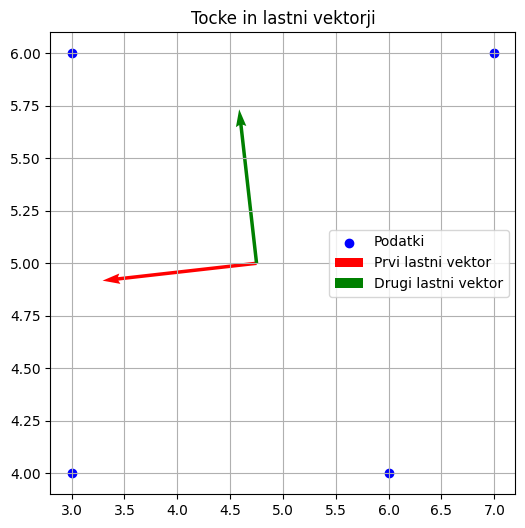

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import a6_utils
import cv2
import os
import time

def compute_mean(data):
    return np.mean(data, axis=0)

def center_data(data, mean):
    return data - mean

def compute_covariance_matrix(data):
    return np.cov(data, rowvar=False)

def perform_svd(cov_matrix):
    U, S, VT = np.linalg.svd(cov_matrix)
    return U, S, VT

def project_to_pca_space(data, mean, eigenvectors):
    centered_data = center_data(data, mean)
    return centered_data @ eigenvectors.T

def reconstruct_from_pca_space(projected_data, mean, eigenvectors):
    return projected_data @ eigenvectors + mean

def PCA(data):
    mean = compute_mean(data)
    centered_data = center_data(data, mean)
    cov_matrix = compute_covariance_matrix(centered_data)
    eigenvectors, eigenvalues, _ = perform_svd(cov_matrix)
    return project_to_pca_space(data, mean, eigenvectors), mean, eigenvectors, eigenvalues

points = np.array([[3, 4], [3, 6], [7, 6], [6, 4]])
projected_points, mean, eigenvectors, eigenvalues = PCA(points)

plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], label="Podatki", color='blue')
plt.quiver(mean[0], mean[1], eigenvectors[0, 0], eigenvectors[0, 1], color='red', scale=3, label="Prvi lastni vektor")
plt.quiver(mean[0], mean[1], eigenvectors[1, 0], eigenvectors[1, 1], color='green', scale=3, label="Drugi lastni vektor")   
plt.legend()
plt.title("Tocke in lastni vektorji")
plt.grid()
plt.show()



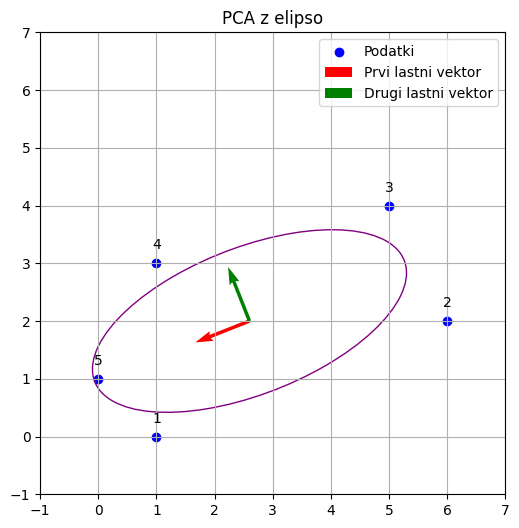

In [3]:
data = np.loadtxt("data/points.txt")
projected_data, mean, eigenvectors, eigenvalues = PCA(data)
cov_matrix_b = compute_covariance_matrix(center_data(data, mean))


plt.figure(figsize=(6, 6))
for i, txt in enumerate(range(1, 6)):
    plt.annotate(txt, (data[i, 0], data[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')
plt.scatter(data[:, 0], data[:, 1], label="Podatki", color='blue')
plt.quiver(mean[0], mean[1], eigenvectors[0, 0], eigenvectors[0, 1], color='red', scale=8, label="Prvi lastni vektor")
plt.quiver(mean[0], mean[1], eigenvectors[1, 0], eigenvectors[1, 1], color='green', scale=8, label="Drugi lastni vektor")
a6_utils.drawEllipse(mean, cov_matrix_b)
plt.legend()
plt.title("PCA z elipso")
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.grid()
plt.show()

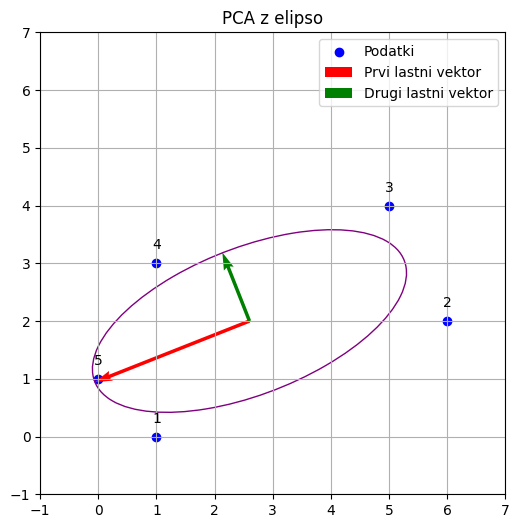

In [4]:
scaled_eigenvectors = eigenvectors * np.sqrt(eigenvalues)[:, np.newaxis]

plt.figure(figsize=(6, 6))
for i, txt in enumerate(range(1, 6)):
    plt.annotate(txt, (data[i, 0], data[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')
plt.scatter(data[:, 0], data[:, 1], label="Podatki", color='blue')
plt.quiver(mean[0], mean[1], scaled_eigenvectors[0, 0], scaled_eigenvectors[0, 1], color='red', scale=8, label="Prvi lastni vektor")
plt.quiver(mean[0], mean[1], scaled_eigenvectors[1, 0], scaled_eigenvectors[1, 1], color='green', scale=8, label="Drugi lastni vektor")
a6_utils.drawEllipse(mean, cov_matrix_b)
plt.legend()
plt.title("PCA z elipso")
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.grid()
plt.show()

### What do you notice about the relationship between the eigenvectors and the data? What happens to the eigenvectors if you change the data or add more points?

The eigenvectors are the directions of the data that have the most variance. If we change the data or add more points, the eigenvectors will change. The eigenvectors will always be orthogonal to each other, but the directions of the eigenvectors will change.

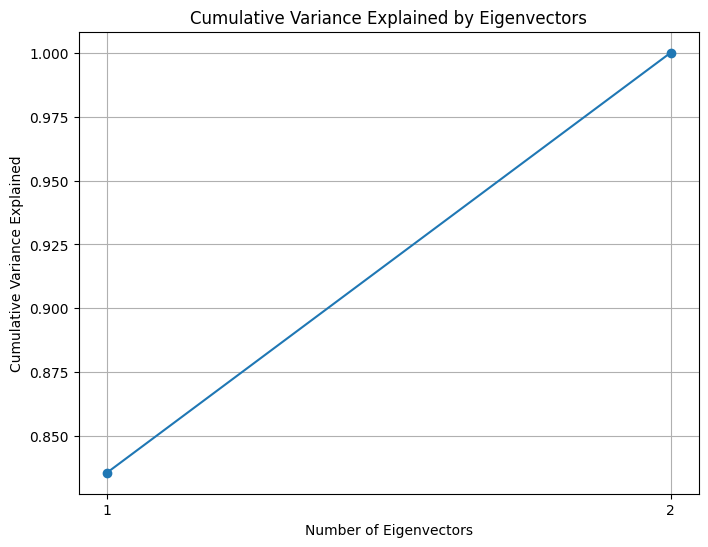

Percentage of variance explained by the first eigenvector: 83.57%


In [5]:
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Cumulative Variance Explained')
plt.xticks([1, 2])
plt.title('Cumulative Variance Explained by Eigenvectors')
plt.grid()
plt.show()

variance_explained_by_first = cumulative_variance[0] * 100
print(f"Percentage of variance explained by the first eigenvector: {variance_explained_by_first:.2f}%")

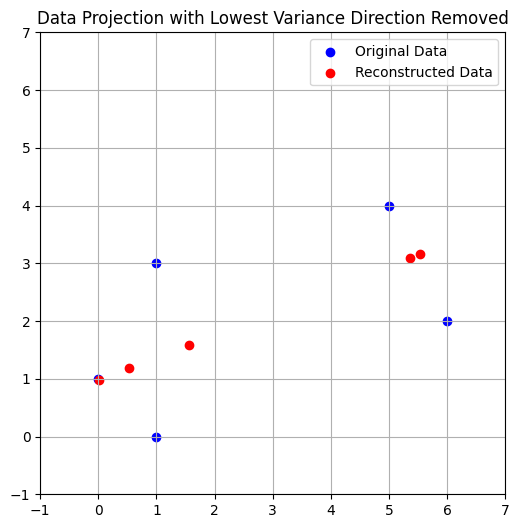

In [6]:
data_pca = project_to_pca_space(data, mean, eigenvectors)
data_pca[:, 1] = 0
reconstructed_data = reconstruct_from_pca_space(data_pca, mean, eigenvectors)

plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], label="Original Data", color='blue')
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], label="Reconstructed Data", color='red')
plt.legend()
plt.title("Data Projection with Lowest Variance Direction Removed")
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.grid()
plt.show()

### What happens to the reconstructed points? Where is the data projected to?

The reconstructed points are projected to the eigenvectors. The data is projected to the eigenvectors.

Closest point to q_point in original space: [5. 4.]
Closest point to q_point in PCA space: [6. 2.]


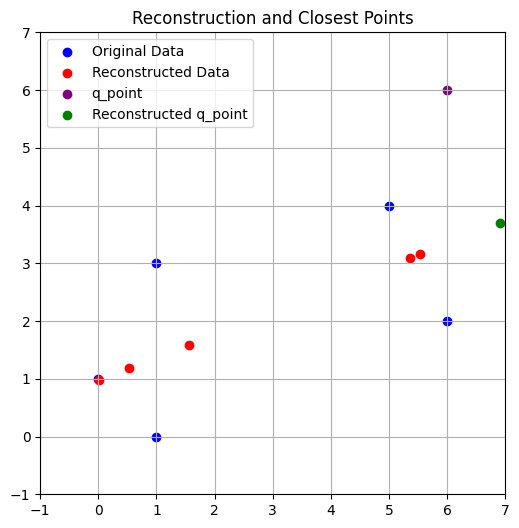

In [7]:
q_point = np.array([6, 6])

distances = np.linalg.norm(data - q_point, axis=1)
closest_point_index = np.argmin(distances)
closest_point = data[closest_point_index]
print(f"Closest point to q_point in original space: {closest_point}")

data_with_q = np.vstack([data, q_point])
projected_data_with_q = project_to_pca_space(data_with_q, mean, eigenvectors)

projected_data_with_q[:, 1] = 0
reconstructed_data_with_q = reconstruct_from_pca_space(projected_data_with_q, mean, eigenvectors)

reconstructed_q_point = reconstructed_data_with_q[-1]
reconstructed_distances = np.linalg.norm(reconstructed_data_with_q[:-1] - reconstructed_q_point, axis=1)
reconstructed_closest_point_index = np.argmin(reconstructed_distances)
reconstructed_closest_point = data[reconstructed_closest_point_index]
print(f"Closest point to q_point in PCA space: {reconstructed_closest_point}")

plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], label="Original Data", color='blue')
plt.scatter(reconstructed_data_with_q[:-1, 0], reconstructed_data_with_q[:-1, 1], label="Reconstructed Data", color='red')
plt.scatter(q_point[0], q_point[1], label="q_point", color='purple')
plt.scatter(reconstructed_q_point[0], reconstructed_q_point[1], color='green', label="Reconstructed q_point")
plt.legend()
plt.title("Reconstruction and Closest Points")
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.grid()
plt.show()

## Exercise 2: The dual PCA method

In [8]:
def dual_pca(data):
    mean = compute_mean(data)
    centered_data = center_data(data, mean)
    dual_cov_matrix = np.dot(centered_data.T, centered_data) / (len(data) - 1)
    eigenvectors, eigenvalues, _  = np.linalg.svd(dual_cov_matrix)
    U_original = np.dot(centered_data, eigenvectors) * np.sqrt(1 / (eigenvalues * (len(data) - 1)))

    U_original[:, 2:] = 0

    return project_to_pca_space(data, mean, U_original), mean, eigenvectors, eigenvalues, U_original

data = np.loadtxt("data/points.txt")
projected_data, mean, eigenvectors, eigenvalues, U = dual_pca(data)
projected_data1, mean1, eigenvectors1, eigenvalues1 = PCA(data)

print("PCA vs dual PCA:")
print("eigenvectors:")
print(eigenvectors1)
print(eigenvectors)
print("eigenvalues:")
print(eigenvalues1)
print(eigenvalues)
print("U:")
print(U)

PCA vs dual PCA:
eigenvectors:
[[-0.92992935 -0.36773822]
 [-0.36773822  0.92992935]]
[[-0.92992935 -0.36773822]
 [-0.36773822  0.92992935]]
eigenvalues:
[8.18975683 1.61024317]
[8.18975683 1.61024317]
U:
[[ 0.38845879 -0.50099451]
 [-0.55241234 -0.49265394]
 [-0.51843817  0.38507594]
 [ 0.19570873  0.59825298]
 [ 0.48668299  0.01031953]]


[[1. 0.]
 [6. 2.]
 [5. 4.]
 [1. 3.]
 [0. 1.]]
[[ 1.00000000e+00 -8.88178420e-16]
 [ 6.00000000e+00  2.00000000e+00]
 [ 5.00000000e+00  4.00000000e+00]
 [ 1.00000000e+00  3.00000000e+00]
 [-2.22044605e-15  1.00000000e+00]]


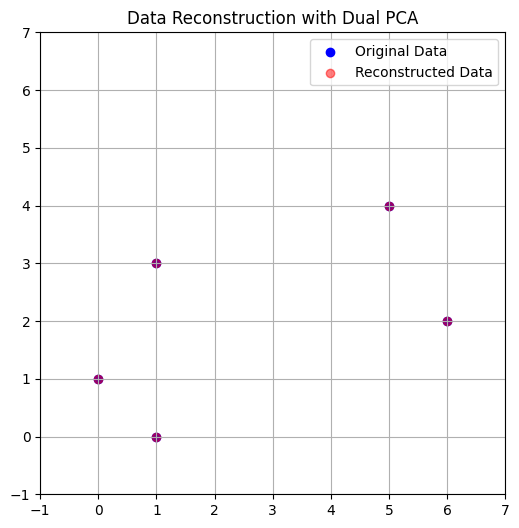

In [9]:
original_data = reconstruct_from_pca_space(projected_data, mean, U)
print(data)
print(original_data)

plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], label="Original Data", color='blue')
plt.scatter(original_data[:, 0], original_data[:, 1], label="Reconstructed Data", color='red', alpha=0.5)
plt.legend()
plt.title("Data Reconstruction with Dual PCA")
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.grid()
plt.show()

## Exercise 3: Image decomposition examples

In [10]:
def prepare_image_matrix(folder_path):
    images = []
    for filename in sorted(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)
        img_vector = np.reshape(np.array(img), -1)
        images.append(img_vector)
    return np.array(images).T

image_folder1 = "data/faces/1"
image_matrix = prepare_image_matrix(image_folder1)
print("Shape of the image matrix:", image_matrix.shape)


Shape of the image matrix: (8064, 64)


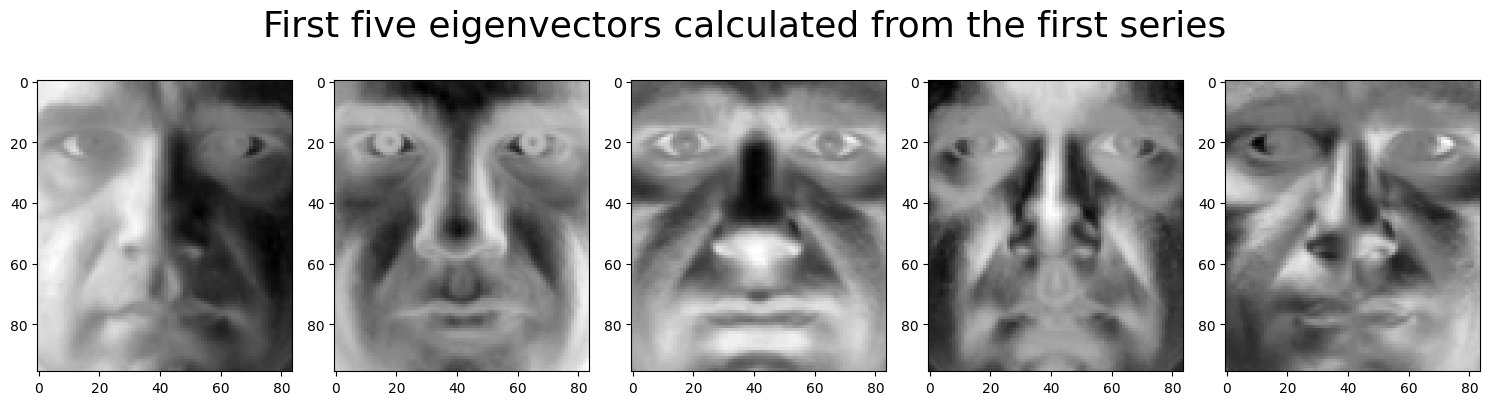

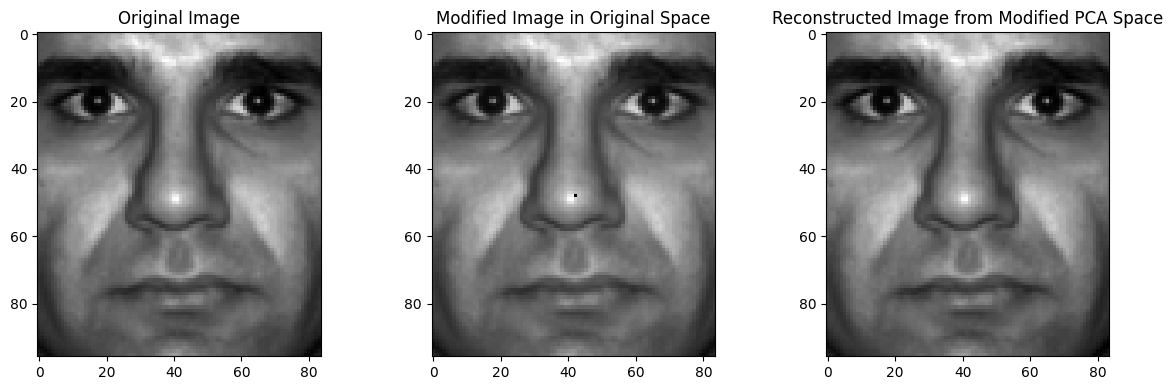

In [11]:
def dual_pca_image(image_matrix):
    mean_images = compute_mean(image_matrix.T)
    centered_images = center_data(image_matrix.T, mean_images)

    dual_cov_matrix = np.dot(centered_images, centered_images.T) / (centered_images.shape[0] - 1)
    U, S, _ = perform_svd(dual_cov_matrix)
    S = S + 1e-15
    eigenvectors = np.dot(centered_images.T, U) / np.sqrt(S * (centered_images.shape[0] - 1))

    return eigenvectors, S, mean_images

eigenvectors, eigenvalues, mean_images = dual_pca_image(image_matrix)

plt.figure(figsize=(15, 4))
plt.suptitle("First five eigenvectors calculated from the first series", fontsize=26)
for i in range(5):
    eigenvector_image = eigenvectors[:, i].reshape((96, 84))
    plt.subplot(1, 5, i+1)
    plt.imshow(eigenvector_image, cmap='gray')

plt.tight_layout()
plt.show()


first_image = image_matrix[:, 0] 
projected = project_to_pca_space(first_image, mean_images, eigenvectors.T)

modified_image = first_image.copy()
modified_image[4074] = 0

modified_projected = projected.copy()
modified_projected[0] = 0
modified_reconstructed = reconstruct_from_pca_space(modified_projected, mean_images, eigenvectors.T)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(first_image.reshape((96, 84)), cmap='gray')
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(modified_image.reshape((96, 84)), cmap='gray')
plt.title("Modified Image in Original Space")

plt.subplot(1, 3, 3)
plt.imshow(modified_reconstructed.reshape((96, 84)), cmap='gray')
plt.title("Reconstructed Image from Modified PCA Space")

plt.tight_layout()
plt.show()

### What do the resulting images represent (both numerically and in the context of faces)?

The resulting images represent the eigenfaces. Eigenvectors define axes in the PCA space, and the eigenfaces are the images that correspond to these axes. First eigenvector represents the direction of the most variance in the data, and the second eigenvector represents the direction of the second most variance in the data, and so on. 
The eigenfaces are the principal components of the faces. Each face can be represented as a linear combination of the eigenfaces.

### What is the difference? How many pixels are changed by the first operation and how many by the second?

In the original space, the change only effects one pixel. In the PCA space, the change effects all the pixels, because PCA linearly combines the eigenvectors to reconstruct the image.
The change in the original space is only one pixel, but the change in the PCA space is global, because the PCA components define face features as a whole.

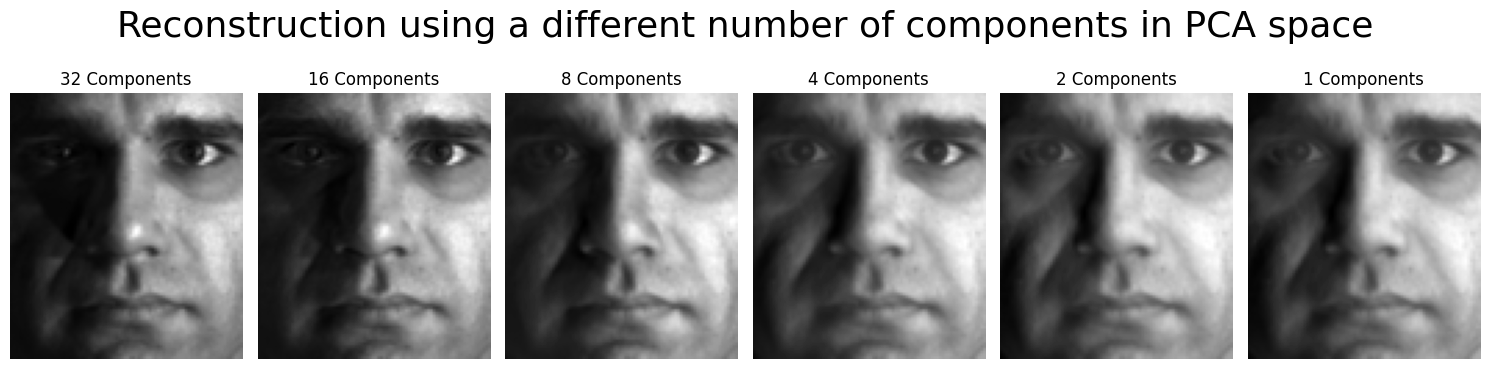

In [12]:
eigenvectors, eigenvalues, mean_image = dual_pca_image(image_matrix)

random_image = image_matrix[:, np.random.randint(image_matrix.shape[1])]

components_list = [32, 16, 8, 4, 2, 1]
reconstructed_images = []

for n_components in components_list:
    image_projected = project_to_pca_space(random_image, mean_image, eigenvectors[:, :n_components].T)
    reconstructed = reconstruct_from_pca_space(image_projected, mean_image, eigenvectors[:, :n_components].T)
    reconstructed_images.append(reconstructed)

plt.figure(figsize=(15, 4))
plt.suptitle("Reconstruction using a different number of components in PCA space", fontsize=26)
for i, n_components in enumerate(components_list):
    plt.subplot(1, 6, i+1)
    plt.imshow(reconstructed_images[i].reshape((96, 84)), cmap='gray')
    plt.title(f"{n_components} Components")
    plt.axis('off')

plt.tight_layout()
plt.show()


### Display the resulting vectors together on one figure. What do you notice?

Reconstructed images with more components are more similar to the original image. The first component is the most important component, and the second component is the second most important component, and so on. The more components we use, the more similar the reconstructed image is to the original image.
With small number of components the details are lost, but the general shape of the face is preserved. With more components the details are preserved, and the reconstructed image is more similar to the original image.

Capturing camera image...
Face 1: Recognized (error: 6089.68)


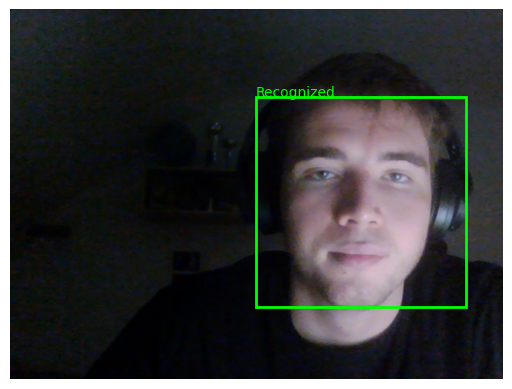

Capturing camera image...
Face 1: Recognized (error: 5502.00)
Face 2: Unknown (error: 7493.48)


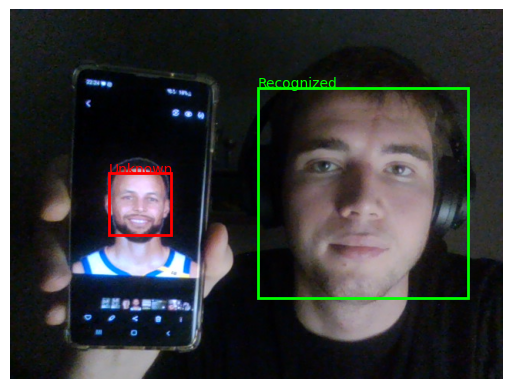

Capturing camera image...
Face 1: Recognized (error: 5704.59)
Face 2: Unknown (error: 7976.08)


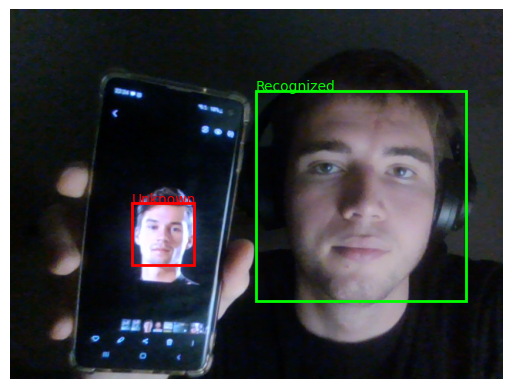

In [53]:
def draw_rectangle(x, y, w, h, label, thickness=2):
    color = (0, 1, 0) if label == "Recognized" else (1, 0, 0)
    plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor=color, linewidth=thickness))
    plt.text(x, y, label, color=color)

def recognize_faces(eigenvectors, mean_face, resolution, threshold):
    cap = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    for _ in range(3):
        time.sleep(2)
        print("Capturing camera image...")
        time.sleep(1)
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5, minSize=(50, 50))
        errors = []
        labels = []
        faces_izpisi = []

        for (x, y, w, h) in faces:
            face = gray[y:y+h, x:x+w]
            face_resized = cv2.resize(face, resolution).flatten()

            projected_face = project_to_pca_space(face_resized, mean_face, eigenvectors)
            reconstructed_face = reconstruct_from_pca_space(projected_face, mean_face, eigenvectors)

            error = np.linalg.norm(face_resized - reconstructed_face)
            label = "Recognized" if error < threshold else "Unknown"

            faces_izpisi.append(face_resized)
            labels.append(label)
            errors.append(error)
        
        plt.imshow(frame)
        for i, (x, y, w, h) in enumerate(faces):
            print(f"Face {i + 1}: {labels[i]} (error: {errors[i]:.2f})")
            draw_rectangle(x, y, w, h, labels[i])

        plt.axis('off')
        plt.show()

    cap.release()
    cv2.destroyAllWindows()

image_folder1 = "data/faces/Aljaz"
image_matrix = prepare_image_matrix(image_folder1)
eigenvectors, eigenvalues, mean_image = dual_pca_image(image_matrix)

recognize_faces(eigenvectors.T, mean_image, (100, 80), 6500)
